In [221]:
!pip install xgboost

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [261]:
import xgboost as xgb
xgb.__version__

'0.71'

In [1]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train['source']=1
test['source']=0

test['Quality_of_life_measure']=-1



all_data=train.append(test)

print(all_data.shape)
print(train.shape,test.shape)
all_data.loc[all_data.source==1].shape

(1252, 42)
(1010, 42) (242, 42)


(1010, 42)

In [4]:
skewed_feats

Index(['CPI_AGRWTH',
       'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
       'GDP_USD_CAP', 'GNI per capita, Atlas method (current US$)',
       'Population ages 00-04 (as % of specified gender population)',
       'Population ages 05-09 (as % of specified gender population)',
       'Population ages 10-14 (as % of specified gender population)',
       'Population ages 15-19 (as % of specified gender population)',
       'Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]',
       'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
       'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
       'Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]',
       'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
       'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]'],
      dtype='object')

In [3]:
numeric_feats =all_data.dtypes[train.dtypes != "object"].index
from scipy.stats import skew

import numpy as np
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.6]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data.head()

/Users/priya/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log1p
  if __name__ == '__main__':


%_Sanitation_Access  \
0                100.0   
1                100.0   
2                100.0   
3                100.0   
4                100.0   

   Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]  \
0                                                NaN                                                 
1                                                NaN                                                 
2                                                NaN                                                 
3                                                NaN                                                 
4                                                NaN                                                 

   Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]  \
0                                              100.0                                          
1                                              100.0                                          
2                                              100.0                                          
3                                              100.0                                          
4                                              100.0                                          

   Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]  \
0                                              100.0                            
1                                              100.0                            
2                                              100.0                            
3                                              100.0                            
4                                              100.0                            

   Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]  \
0                                              100.0                                          
1                                              100.0                                          
2                                              100.0                                          
3                                              100.0                                          
4                                              100.0                                          

   CPI_AGRWTH  EDU_TERTIARY_PC_WKGPOP  \
0    1.012928               23.508869   
1    1.012928               21.418512   
2    1.088439               24.407070   
3    1.088439               21.740088   
4    1.727713               25.825409   

   Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]  \
0                                           2.140415                                           
1                                           2.140415                                           
2                                           2.104955                                           
3                                           2.104955                                           
4                                           2.088939                                           

   GDP_USD_CAP GENDER   ...    \
0     9.900021    MEN   ...     
1     9.900021  WOMEN   ...     
2     9.958693    MEN   ...     
3     9.958693  WOMEN   ...     
4    10.003314    MEN   ...     

   Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]  \
0                                           9.753885                   
1                                           9.753885                   
2                                           9.743495                   
3                                           9.743495                   
4                                           9.719084                   

   Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]  \
0                                           2.446685

In [265]:
cols_null=['%_Sanitation_Access',
 'Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]',
 'Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]',
 'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
 'Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]',
 'CPI_AGRWTH',
 'EDU_TERTIARY_PC_WKGPOP',
 'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
 'GDP_USD_CAP',
 'GOV_SPEND_EDU',
 'Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]',
 'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
 'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
 'Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]',
 'TER_Enrolment_rate',
 'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
 'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]']


for col in cols_null:
    if all_data[col].dtype=='object':
        all_data[col].fillna(all_data[col].value_counts().idxmax(),inplace=True)
    else:
        all_data[col].fillna(all_data[col].median(),inplace=True)
  
all_data.loc[all_data.source==1].shape

(1010, 42)

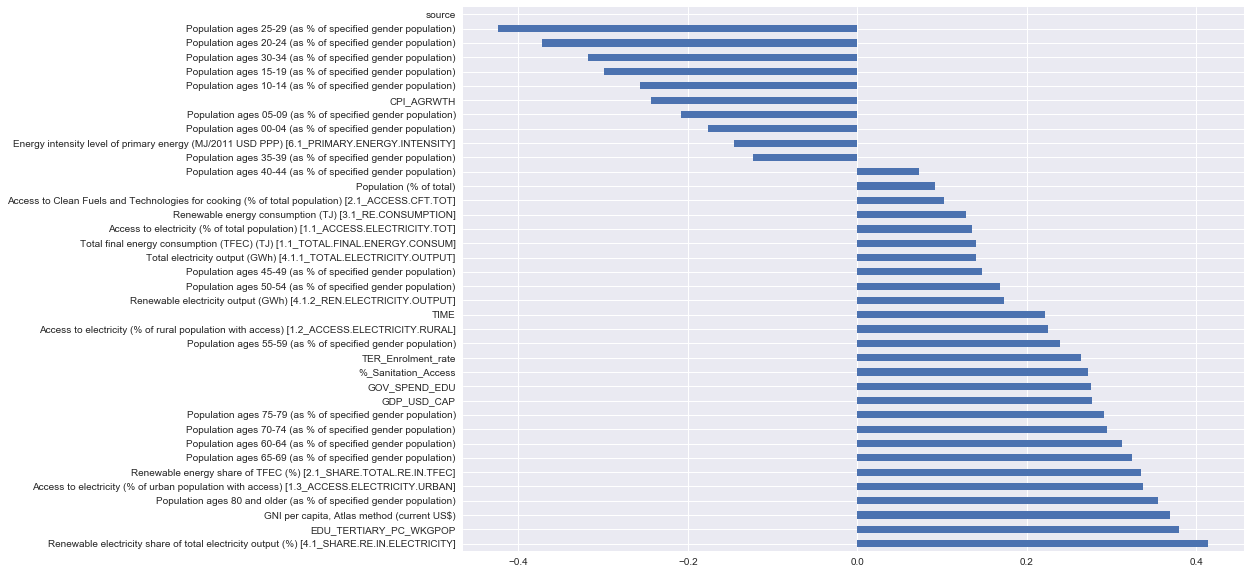

In [266]:
import matplotlib.pyplot as plt # Visualization
corr_with_qoh = train.drop(["id"], axis=1).corr()["Quality_of_life_measure"].sort_values(ascending=False)
plt.figure(figsize=(14,10))
corr_with_qoh.drop("Quality_of_life_measure").plot.barh()
plt.show()



In [267]:
df1=pd.get_dummies(all_data.GENDER)
all_data=pd.concat([df1,all_data],axis=1)
all_data.drop('GENDER',axis=1,inplace=True)
all_data.head()

MEN  WOMEN  %_Sanitation_Access  \
0    1      0                100.0   
1    0      1                100.0   
2    1      0                100.0   
3    0      1                100.0   
4    1      0                100.0   

   Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]  \
0                                              100.0                                                 
1                                              100.0                                                 
2                                              100.0                                                 
3                                              100.0                                                 
4                                              100.0                                                 

   Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]  \
0                                              100.0                                          
1                                              100.0                                          
2                                              100.0                                          
3                                              100.0                                          
4                                              100.0                                          

   Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]  \
0                                              100.0                            
1                                              100.0                            
2                                              100.0                            
3                                              100.0                            
4                                              100.0                            

   Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]  \
0                                              100.0                                          
1                                              100.0                                          
2                                              100.0                                          
3                                              100.0                                          
4                                              100.0                                          

   CPI_AGRWTH  EDU_TERTIARY_PC_WKGPOP  \
0    1.012928               23.508869   
1    1.012928               21.418512   
2    1.088439               24.407070   
3    1.088439               21.740088   
4    1.727713               25.825409   

   Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]  \
0                                           2.140415                                           
1                                           2.140415                                           
2                                           2.104955                                           
3                                           2.104955                                           
4                                           2.088939                                           

    ...    Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]  \
0   ...                                             9.753885                   
1   ...                                             9.753885                   
2   ...                                             9.743495                   
3   ...                                             9.743495                   
4   ...                                             9.719084                   

   Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]  \
0                                           2.446685                                           
1                                  

In [268]:
all_data.columns=['MEN',
 'WOMEN',
 'Sanitation',
 'CleanFuels',
 'Electricity_Rural',
 'Electricity_Total',
 'Electricity_Urban',
 'CPI',
 'EDU_TERTIARY',
 'Energy_Intensity',
 'GDP_USD_CAP',
 'GNI',
 'GOV_SPEND_EDU',
 'LOCATION',
 'PopulationM/F',
 'Population00-04',
 'Population05-09',
 'Population10-14',
 'Population15-19',
 'Population20-24',
 'Population25-29',
 'Population30-34',
 'Population35-39',
 'Population40-44',
 'Population45-49',
 'Population50-54',
 'Population55-59',
 'Population60-64',
 'Population65-69',
 'Population70-74',
 'Population75-79',
 'Population80+',
 'Quality_of_life_measure',
 'Renewable_Electricity_Output',
 'Renewable_Electricity_Share',
 'Renewable_Energy_Consumption',
 'Renewable_Energy_Perc',
 'TER_Enrolment_rate',
 'TIME',
 'Total_Electricity_Output',
 'Total_Energy_Consumption',
 'id',
 'source']

import seaborn as sns
train=all_data[all_data.source==1]
test=all_data[all_data.source==0]
interesting_cols=['GNI',
                  'Population25-29'
                 ,'Quality_of_life_measure']
                 # 'Population80+','Renewable_Electricity_Share',
                 #'EDU_TERTIARY','GDP_USD_CAP'
plt.figure(figsize=(12,10))
sns.pairplot(train[interesting_cols], dropna=True,plot_kws={"s": 3} )
plt.show()
                  #Linear trend GNI GDP_USD_CAP?Population GNI?

import seaborn as sns
%matplotlib inline
sns.heatmap(all_data[all_data.source==1].corr())

In [269]:
train=all_data[all_data.source==1]
test=all_data[all_data.source==0]
y=train.Quality_of_life_measure
cols=[i for i in train.columns if i not in ['id','Quality_of_life_measure','LOCATION','source']]

X=train.loc[:,cols]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape)
X_train.head()

(808, 39) (202, 39)


MEN  WOMEN  Sanitation  CleanFuels  Electricity_Rural  Electricity_Total  \
54     1      0       100.0  100.000000              100.0              100.0   
884    1      0        98.8   98.363606              100.0              100.0   
461    0      1        98.0  100.000000              100.0              100.0   
518    1      0        98.8  100.000000              100.0              100.0   
828    1      0        99.1  100.000000              100.0              100.0   

     Electricity_Urban       CPI  EDU_TERTIARY  Energy_Intensity  \
54               100.0  1.181477     29.093615          1.649885   
884              100.0  1.323547     14.134305          1.936491   
461              100.0  2.192630     19.560244          1.757146   
518              100.0  2.039540     26.779726          2.664826   
828              100.0 -1.092930     23.412970          1.761515   

               ...             Population75-79  Population80+  \
54             ...                    2.728381       2.330586   
884            ...                    1.816565       1.681944   
461            ...                    3.969247       4.900668   
518            ...                    2.273739       2.515004   
828            ...                    2.242662       2.641769   

     Renewable_Electricity_Output  Renewable_Electricity_Share  \
54                      10.472035                     4.123580   
884                      8.504108                     2.927989   
461                      7.541152                     1.742219   
518                      9.203014                     4.614724   
828                      9.805957                     2.798192   

     Renewable_Energy_Consumption  Renewable_Energy_Perc  TER_Enrolment_rate  \
54                      12.365426               3.160348           42.856461   
884                     10.464798               2.222695           40.478840   
461                     10.652321               1.965759           80.127876   
518                     10.889710               4.174625           50.862068   
828                     12.023457               2.427476           63.034420   

     TIME  Total_Electricity_Output  Total_Energy_Consumption  
54   2003                 10.969887                 13.853581  
884  2007                 10.236131                 12.961891  
461  2007                 10.595659                 13.442590  
518  2006                  9.203416                 11.335749  
828  2016                 11.321077                 13.849696  

[5 rows x 39 columns]

#ridgeReg = Ridge(alpha=0.05, normalize=True)
from sklearn.linear_model import Lasso,Ridge
def calculateRMSE(algo):
    algo.fit(X_train,y_train)
    pred = algo.predict(X_test)

    rmse = np.sqrt(np.mean((pred - y_test)**2))
    return rmse
alphas = [0.01,0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [calculateRMSE(Ridge(alpha = alpha)) for alpha in alphas]

#0.3 alpha
ridgeReg = Ridge(alpha=0.1)
calculateRMSE(ridgeReg)
ridgeReg.fit(X,y)
pred_test=ridgeReg.predict(test.loc[:,cols])
df_test=pd.DataFrame({'target':pred_test})
df_test['id']=test['id']
df_test.head()
df_test.to_csv("out1.csv",columns=['id','target'],index=False)

In [270]:
# Define a function to calculate RMSE
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer 
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

# Define a function to calculate negative RMSE (as a score)
def nrmse(y_true, y_pred):
    return -1.0*rmse(y_true, y_pred)
neg_rmse = make_scorer(nrmse)




model = XGBRegressor()
selector = RFECV(model, cv = 3, n_jobs = -1, scoring = neg_rmse)
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from xgboost import XGBRegressor, plot_importance # XGBoost
thresh = 5 * 10**(-3)


selector = selector.fit(X_train, y_train)

print("The number of selected features is: {}".format(selector.n_features_))

features_kept = X_train.columns.values[selector.support_] 

X_train_1 = selector.transform(X_train)  
X_test_1 = selector.transform(X_test)

# transform it to a numpy array so later we can feed it to a neural network
y_train_1 = y_train.values 


The number of selected features is: 32


In [271]:
train_fully=selector.transform(train.loc[:,cols])
test_fully=selector.transform(test.loc[:,cols])

In [272]:
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from xgboost import XGBRegressor, plot_importance # XGBoost
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [273]:

#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
# test 
select_X_test = selection.transform(X_test)
select_test = selection.transform(test.loc[:,cols])


print(select_X_train.shape,X_train.shape)
print(select_X_test.shape)
print ("XGB Version: " + str(xgb.__version__))

(808, 36) (808, 39)
(202, 36)
XGB Version: 0.71


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_Ridge: -0.005856 (+/- 0.001021)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Elastic: -0.012067 (+/- 0.002264)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_Lasso: -0.012067 (+/- 0.002264)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_SVR: -0.004881 (+/- 0.000380)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_RF: -0.001064 (+/- 0.000883)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_ET: -0.000545 (+/- 0.000247)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_BR: -0.001158 (+/- 0.000915)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_XGB: -0.001131 (+/- 0.000559)


/Users/priya/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


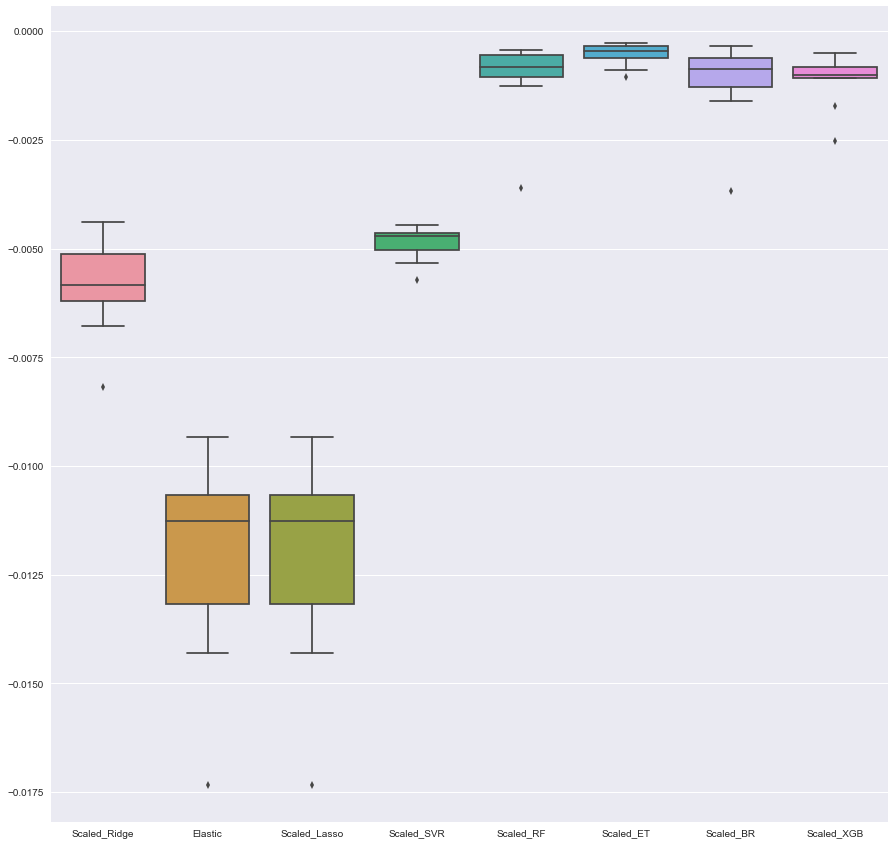

In [275]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import ElasticNet
pipelines = []
from pylab import rcParams
rcParams['figure.figsize'] = 15 ,15
seed=42
pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed))
                      ]))
                )
pipelines.append(
                ("Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Elastic", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR", SVR())
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_XGB",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGB", XGBRegressor(seed=seed))
                 ])
                )
                )

scoring = 'mean_squared_error'
n_folds = 10
results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    #cv_results = cross_val_score(model, select_X_train, y_train, cv= kfold,
    #                             scoring=scoring, n_jobs=-1)    
    cv_results = cross_val_score(model, X_train_1, y_train_1, cv= kfold,
                               scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
results = pd.DataFrame(np.array(results).T, columns = names)    
sns.boxplot(results)
plt.show()

In [ ]:
select_train = selection.transform(train.loc[:,cols])
select_test = selection.transform(test.loc[:,cols])


#best_model = clone(grid_rf.best_estimator_)
grid_rf.fit(select_train,y)
preds=grid_rf.predict(select_test)

In [203]:
et_reg=pipelines[-3][1]
param_grid =  [ { 
        'ET__n_estimators': [100,200,300,400,500],          
        'ET__max_depth': np.arange(5,9,1),
        'ET__max_features': [ 'sqrt','log2'] 
       }]


grid_rf = GridSearchCV(estimator=et_reg,
                               param_grid= param_grid,
                               scoring= 'neg_mean_squared_error',
                               cv = KFold(n_splits= 3, random_state= 42, shuffle=True),
                               verbose = 2 )
# Fit grid
grid_rf.fit(X_train_1, y_train_1)

# Best score and best parameters
print('-------Best score----------')
print(grid_rf.best_score_ )
print('-------Best params----------')
print(grid_rf.best_params_)                                                           
                              

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=100 ....
[CV]  ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=100, total=   0.1s
[CV] ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=100 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=100, total=   0.1s
[CV] ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=100 ....
[CV]  ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=100, total=   0.1s
[CV] ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=200 ....
[CV]  ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=200, total=   0.3s
[CV] ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=200 ....
[CV]  ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=200, total=   0.3s
[CV] ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=200 ....
[CV]  ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=200, total=   0.3s
[CV] ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=300 ....
[CV]  ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=300, total=   0.4s
[CV] ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=300 ....
[CV]  ET__max_depth=5, ET__max_features=sqrt, ET__n_estimators=300, total=   0.3s


[CV]  ET__max_depth=6, ET__max_features=log2, ET__n_estimators=400, total=   0.6s
[CV] ET__max_depth=6, ET__max_features=log2, ET__n_estimators=400 ....
[CV]  ET__max_depth=6, ET__max_features=log2, ET__n_estimators=400, total=   0.6s
[CV] ET__max_depth=6, ET__max_features=log2, ET__n_estimators=500 ....
[CV]  ET__max_depth=6, ET__max_features=log2, ET__n_estimators=500, total=   0.7s
[CV] ET__max_depth=6, ET__max_features=log2, ET__n_estimators=500 ....
[CV]  ET__max_depth=6, ET__max_features=log2, ET__n_estimators=500, total=   0.7s
[CV] ET__max_depth=6, ET__max_features=log2, ET__n_estimators=500 ....
[CV]  ET__max_depth=6, ET__max_features=log2, ET__n_estimators=500, total=   0.7s
[CV] ET__max_depth=7, ET__max_features=sqrt, ET__n_estimators=100 ....
[CV]  ET__max_depth=7, ET__max_features=sqrt, ET__n_estimators=100, total=   0.1s
[CV] ET__max_depth=7, ET__max_features=sqrt, ET__n_estimators=100 ....
[CV]  ET__max_depth=7, ET__max_features=sqrt, ET__n_estimators=100, total=   0.1s


[CV]  ET__max_depth=8, ET__max_features=log2, ET__n_estimators=200, total=   0.3s
[CV] ET__max_depth=8, ET__max_features=log2, ET__n_estimators=200 ....
[CV]  ET__max_depth=8, ET__max_features=log2, ET__n_estimators=200, total=   0.3s
[CV] ET__max_depth=8, ET__max_features=log2, ET__n_estimators=300 ....
[CV]  ET__max_depth=8, ET__max_features=log2, ET__n_estimators=300, total=   0.5s
[CV] ET__max_depth=8, ET__max_features=log2, ET__n_estimators=300 ....
[CV]  ET__max_depth=8, ET__max_features=log2, ET__n_estimators=300, total=   0.5s
[CV] ET__max_depth=8, ET__max_features=log2, ET__n_estimators=300 ....
[CV]  ET__max_depth=8, ET__max_features=log2, ET__n_estimators=300, total=   0.5s
[CV] ET__max_depth=8, ET__max_features=log2, ET__n_estimators=400 ....
[CV]  ET__max_depth=8, ET__max_features=log2, ET__n_estimators=400, total=   0.6s
[CV] ET__max_depth=8, ET__max_features=log2, ET__n_estimators=400 ....
[CV]  ET__max_depth=8, ET__max_features=log2, ET__n_estimators=400, total=   0.6s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   56.5s finished


-------Best score----------
-0.00299908840944
-------Best params----------
{'ET__max_depth': 8, 'ET__max_features': 'sqrt', 'ET__n_estimators': 400}


In [ ]:

dtrain1 = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

our_params = {'eta': 0.01, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
              'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain=dtrain1 , num_boost_round =500, nfold = 5,
                metrics = ['rmse'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 50) # Look for early stopping that minimizes error


In [ ]:
select_X_train

In [ ]:
xgb1= xgb.train(our_params, dtrain1, num_boost_round = 500)
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
xgb.plot_importance(xgb1)

In [ ]:
importances = xgb1.get_fscore()
importances


In [ ]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')


In [ ]:
y_pred = xgb1.predict(dtest) # Predict using our testdmat
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

In [ ]:
dtrain1 = xgb.DMatrix(X,y)
dtest1=xgb.DMatrix(test.loc[:,cols])
xgb1= xgb.train(our_params, dtrain1, num_boost_round = 500)
preds=xgb1.predict(dtest1)

In [206]:
df_test=pd.DataFrame({'target':preds})
df_test['id']=test['id']
df_test.head()
df_test.to_csv("out3.csv",columns=['id','target'],index=False)

In [205]:
preds

array([ 0.54478224,  0.55902278,  0.54930319,  0.56356684,  0.55394393,
        0.56644136,  0.55200092,  0.5673455 ,  0.55018453,  0.56814411,
        0.55007803,  0.56695919,  0.54969059,  0.56742112,  0.5547626 ,
        0.57201893,  0.55370629,  0.57093732,  0.55299882,  0.57028157,
        0.52432021,  0.55123058,  0.53678941,  0.55909778,  0.48028228,
        0.51693444,  0.49242542,  0.5295822 ,  0.49831675,  0.53103872,
        0.50880255,  0.537289  ,  0.5235468 ,  0.55289177,  0.53045474,
        0.56041028,  0.54017664,  0.56625179,  0.54540935,  0.56779837,
        0.54353416,  0.56725284,  0.54903574,  0.56901778,  0.55323131,
        0.57053611,  0.54763752,  0.56982131,  0.5404865 ,  0.57041546,
        0.4594627 ,  0.46636564,  0.46704614,  0.47347735,  0.46934158,
        0.4717742 ,  0.46676012,  0.46336103,  0.47250064,  0.47431472,
        0.48325081,  0.48648246,  0.48570567,  0.49082788,  0.49596529,
        0.49797478,  0.51398616,  0.52152242,  0.5063217 ,  0.51